In [42]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
import spacy
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [43]:
data_path = r'/Users/mohammadrezaghassemzadeh/Desktop/p-matching/product-matching/kik_datenbereinigt.xlsx'
data = pd.read_excel(data_path)
data.head(10)

,Unnamed: 0,description_txt,category_name_sxt,colour_t,colours_txt
0,0,produktdetails 100 % baumwolle weiter rundhals...,damen damen bekleidung bekleidung shir...,weißpetrol,weißpetrol
1,1,produktdetails schriftzug vorne rundhalsaussch...,damen damen bekleidung bekleidung shir...,schwarz,schwarz
2,2,produktdetails unifarbe kleiner ergeenomixx sc...,damen damen bekleidung bekleidung shir...,limone,limone
3,3,produktdetails blumenmuster rundhalsausschnitt...,damen damen bekleidung bekleidung shir...,schwarzrosa,schwarzrosa schwarz bedruckt
4,4,produktdetails blumenmuster rundhalsausschnitt...,damen damen bekleidung bekleidung shir...,schwarz bedruckt,schwarzrosa schwarz bedruckt
5,5,produktdetails hoher baumwollanteil stretchant...,damen damen bekleidung bekleidung shir...,dunkelrosa,dunkelrosa dunkelblau koralle
6,6,produktdetails hoher baumwollanteil stretchant...,damen damen bekleidung bekleidung shir...,dunkelblau,dunkelrosa dunkelblau koralle
7,7,produktdetails hoher baumwollanteil stretchant...,damen damen bekleidung bekleidung shir...,koralle,dunkelrosa dunkelblau koralle
8,8,produktdetails unifarbe rundhalsausschnitt hoh...,damen damen bekleidung bekleidung shir...,weiß,weiß
9,9,produktdetails hoher baumwollanteil stretchant...,damen damen bekleidung bekleidung shir...,dunkelblau,dunkelblau senfgelb flieder


In [44]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

def plot_clusters(data, labels):
    # Reduzieren der Dimensionalität auf 2D für die Visualisierung, falls notwendig
    if data.shape[1] > 2:
        pca = PCA(n_components=2)
        reduced_data = pca.fit_transform(data)
    else:
        reduced_data = data

    # Einzigartige Labels identifizieren
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Schwarz für Rauschen oder ungelabelte Daten
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        # Plotten der Datenpunkte
        xy = reduced_data[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

    plt.title('Cluster Visualisierung')
    plt.xlabel('Komponente 1')
    plt.ylabel('Komponente 2')
    plt.show()


In [45]:
def tf_idf(df, columns: list[str]):
    # TF-IDF-Anwendung, die Daten werden in Vekroren (numerische) umgewandelt. 
    # TF => Misst wie häufig Wörter in einem Datensatz vorkommen, woebi Wörter die häufiger vokommen,als wichtger angesehen werden.
    # IDF => Misst wie wichtig ein Wort ist, inedm es berücksichtigt wird, wie oft ein Wort in der gesamten Korpus vorkommt, seltene Wörter werden als wichtug gestuft. 
    # param df: Data Frame, Daten
    # param column: Spalte, wofür das angewendet werden soll. 
    vectorizer = TfidfVectorizer()
    result = {}

    for column in columns:
        # Stellen Sie sicher, dass die Daten als String vorliegen
        text_data = df[column].astype(str)
        X = vectorizer.fit_transform(text_data)
        result[column] = X

    return result

In [46]:
# Vektoriesierung
column = ['description_txt']
result_tf_idf = tf_idf(data,column)

print(result_tf_idf)

{'description_txt': <99x143 sparse matrix of type '<class 'numpy.float64'>'
	with 1479 stored elements in Compressed Sparse Row format>}


In [47]:
import numpy as np

def dbscan(tfidf_dict, column_name):
    # Extrahieren der TF-IDF-Matrix für eine spezifische Spalte
    tfidf_matrix = tfidf_dict[column_name]

    # Umwandlung der Sparse-Matrix in ein numpy Array
    dense_tfidf_array = np.array(tfidf_matrix.todense())

    # Skalierung des numpy Arrays
    X_scaled = StandardScaler().fit_transform(dense_tfidf_array)

   
    dbscan_model = DBSCAN(eps=0.5, min_samples=5)
    dbscan_clusters = dbscan_model.fit_predict(X_scaled)

    return dbscan_clusters, X_scaled


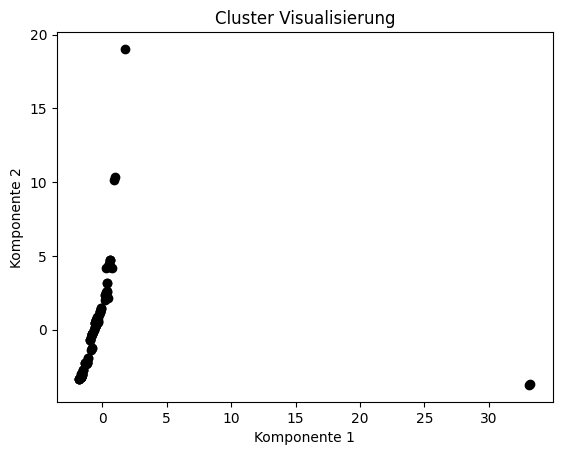

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  0  0  0  0 -1 -1 -1  1  1  1  1
  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1]


In [48]:
columns = 'description_txt'
# Ausgab: -1 -> steht für ausreiser oder rauschen 
# 0 & 1 steht für Label der Cluster die durch DBSCAN indentifiziert würden

result_dbscan, X_scaled = dbscan(result_tf_idf,columns)

data['cluster_dbscan'] = result_dbscan

plot_clusters(X_scaled, result_dbscan)

print(result_dbscan)

In [49]:
def k_means_clustering(data, tdidf_value):
    # K_means_clustering Methode
    # Anwendung von K-Means Clustering
    # param tfidf_value: dieses Wert kommt aus der Methode tf_idf und ist hierbei das ergebnis der MEthode

    # Identifizierung der dichten Cluster von DBSCAN (ohne Ausreißer)
    dichte_cluster_indizes = data['cluster_dbscan'] != -1
    X_dicht = X_scaled[dichte_cluster_indizes]

    # Anwendung von K-Means auf die dichten Cluster
    kmeans = KMeans(n_clusters=5)  # Anpassung der Clusteranzahl
    kmeans_clusters = kmeans.fit_predict(X_dicht)

    data.loc[dichte_cluster_indizes, 'cluster_kmeans'] = kmeans_clusters

    return kmeans_clusters, 

In [50]:
result_k_mean = k_means_clustering(data, result_tf_idf)
print(result_k_mean)


(array([0, 0, 0, 0, 0, 1, 1, 1, 4, 4, 4, 4, 1], dtype=int32),)


/Users/mohammadrezaghassemzadeh/Desktop/p-matching/product-matching/bachelorarbeit/lib/python3.9/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [56]:

clustered_data = data[data['cluster_dbscan'] != -1]

#print(clustered_data)
clustered_data.to_excel('/Users/mohammadrezaghassemzadeh/Desktop/p-matching/product-matching/Daten_clustert.xlsx')
clustered_data.to_csv('/Users/mohammadrezaghassemzadeh/Desktop/p-matching/product-matching/Daten_clustert.csv')
daten = pd.read_csv('/Users/mohammadrezaghassemzadeh/Desktop/p-matching/product-matching/Daten_clustert.csv')
print(daten)

    Unnamed: 0.1  Unnamed: 0  \
0             59          59   
1             61          61   
2             62          62   
3             63          63   
4             64          64   
5             68          68   
6             69          69   
7             70          70   
8             71          71   
9             72          72   
10            73          73   
11            74          74   
12            75          75   

                                      description_txt  \
0   produktdetails komplett bedruckt rundhalsaussc...   
1   produktdetails komplett bedruckt rundhalsaussc...   
2   produktdetails komplett bedruckt rundhalsaussc...   
3   produktdetails komplett bedruckt rundhalsaussc...   
4   produktdetails komplett bedruckt rundhalsaussc...   
5   produktdetails unifarbe v ausschnitt kurzarm g...   
6   produktdetails unifarbe v ausschnitt kurzarm g...   
7   produktdetails unifarbe v ausschnitt kurzarm g...   
8   produktdetails unifarbe v ausschni